In [1]:
# Code Cell 1
import pandas as pd
import numpy as np

In [2]:
# Code Cell 2
# Import data from csv file, and visualize the first rows
#df_compact = 
#df_compact.?()

# SOLUTION
df_compact = pd.read_csv("./data/rpi_data_compact.csv")
df_compact.head(3)

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25


In [3]:
# Code Cell 3
# Remove extra index columns

# SOLUTION
df_compact.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
# Code Cell 4
NaNs_in_df = df_compact.isnull()
print(type(NaNs_in_df))
NaNs_in_df.head()

<class 'pandas.core.frame.DataFrame'>


,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [5]:
# Code Cell 5
NaNs_per_column = NaNs_in_df.sum()
print(type(NaNs_per_column))
NaNs_per_column.head()

<class 'pandas.core.series.Series'>


Ping (ms)            1
Download (Mbit/s)    1
Upload (Mbit/s)      7
Date                 7
Time                 7
dtype: int64

In [6]:
# Code Cell 6
NaNs_total = NaNs_per_column.sum()
NaNs_total

23

In [7]:
# Code Cell 7
df_compact.isnull().sum().sum()

23

In [8]:
# Code Cell 8
NaNs_pct = np.round(df_compact.isnull().sum().sum()/float(len(df_compact)*len(df_compact.columns))*100, decimals = 4)
print('The DataFrame contains : {} NaNs, equal to {} of the measurements'.format(NaNs_total, NaNs_pct)) #EDL : moved parenthesis

The DataFrame contains : 23 NaNs, equal to 0.6765 of the measurements


In [9]:
# Code Cell 9
# Remove NaN values
df_compact_clean = df_compact.dropna()

In [10]:
# Code Cell 10

# SOLUTION
# df_compact.isnull().sum().sum()

df_compact_clean.isnull().sum().sum()

0

In [11]:
# Code Cell 11
# Ping and Download are not floats
df_compact.dtypes

Ping (ms)             object
Download (Mbit/s)     object
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [12]:
# Code Cell 12
str_val = '10.56'
float_val = float(str_val)
print(str_val, type(str_val), float_val, type(float_val))

10.56 <class 'str'> 10.56 <class 'float'>


In [13]:
# Code Cell 14
# this disables a notebook warning that is not relevant for our use case
pd.options.mode.chained_assignment = None

# Convert Ping and Download to float
#df_compact_clean['Ping (ms)_float'] = ...
#df_compact_clean['Download (Mbit/s)_float'] = ...

#Check that the types have been successfully converted
# ...

# SOLUTION
# Convert Ping and Download to float
df_compact_clean['Ping (ms)_float'] = df_compact_clean['Ping (ms)'].apply(lambda str_val: float(str_val))
df_compact_clean['Download (Mbit/s)_float'] = df_compact_clean['Download (Mbit/s)'].apply(lambda str_val: float(str_val))

#Check that the types have been successfully converted
df_compact_clean['Ping (ms)_float'].head()
# df_compact_clean['Download (Mbit/s)_float'].head()

0    26.992
1    24.532
2    20.225
3    19.332
4    22.494
Name: Ping (ms)_float, dtype: float64

In [14]:

#Check that the types have been successfully converted
# df_compact_clean['Ping (ms)_float'].head()
df_compact_clean['Download (Mbit/s)_float'].head()

0    91.80
1    88.19
2    59.86
3    91.81
4    92.05
Name: Download (Mbit/s)_float, dtype: float64

In [15]:
# Code Cell 15
# Remove the original 'Ping (ms)' and 'Download (Mbit/s)' columns
# Rename the new 'Ping (ms) float' and 'Download (Mbit/s) float ' to Ping (ms)' and 'Download (Mbit/s)

# SOLUTION
# Remove the original 'Ping (ms)' and 'Download (Mbit/s)' columns
df_compact_clean.drop(['Ping (ms)', 'Download (Mbit/s)'], axis=1, inplace=True)
# Rename the new 'Ping (ms) float' and 'Download (Mbit/s) float ' to Ping (ms)' and 'Download (Mbit/s)
df_compact_clean.rename(columns={'Ping (ms)_float':'Ping (ms)', 
                                 'Download (Mbit/s)_float':'Download (Mbit/s)'}, inplace=True)
# df_compact_clean.head()

In [16]:
# Code Cell 16
df_compact_clean.head()

,Upload (Mbit/s),Date,Time,Ping (ms),Download (Mbit/s)
0,14.31,2016-11-24,13:36:25,26.992,91.80
1,14.12,2016-11-24,13:36:55,24.532,88.19
2,14.11,2016-11-24,13:37:25,20.225,59.86
3,14.22,2016-11-24,13:37:57,19.332,91.81
4,14.08,2016-11-24,13:38:27,22.494,92.05


In [17]:
# Code Cell 17
df_compact_clean = df_compact_clean.reindex(columns = ['Date', 'Time', 'Ping (ms)','Download (Mbit/s)','Upload (Mbit/s)']);
df_compact_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


In [18]:
# Code Cell 18
# Let's save the new cleaned dataframe to a csv
df_compact_clean.to_csv('./data/rpi_data_processed.csv', index=False)

df_clean = df_compact_clean

In [19]:
# Code Cell 19
# Compute mean and std for all the columns of df_compact
# SOLUTION:
means = df_clean.mean()
stands = df_clean.std()

# Place mean and std for each column in a tuple
stats_ping = (means['Ping (ms)'], stands['Ping (ms)'])
stats_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
stats_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])

# Print the mean value ± the standard deviation, including measuring units
print('Average ping time: {} ± {} ms'.format(stats_ping[0],stats_ping[1]))
print('Average download speed: {} ± {} Mbit/s'.format(*stats_download))
print('Average upload speed: {} ± {} Mbit/s'.format(*stats_upload))

Average ping time: 21.115451708766724 ± 5.161225495663228 ms
Average download speed: 90.44921248142644 ± 3.4656470318152284 Mbit/s
Average upload speed: 13.697607726597328 ± 1.0804708853031768 Mbit/s


In [20]:
# Code Cell 23
# Compute max and min for all the columns of df_compact
mins = df_clean.min()
maxs = df_clean.max()

# Place mean and std for each column in a tuple
mima_ping = (mins['Ping (ms)'], maxs['Ping (ms)'])
mima_download = (mins['Download (Mbit/s)'], maxs['Download (Mbit/s)'])
mima_upload = (mins['Upload (Mbit/s)'], maxs['Upload (Mbit/s)'])

# Print the mean and max values, including measuring units
print('Min ping time: {} ms. Max ping time: {} ms'.format(*mima_ping))
print('Min download speed: {} Mbit/s. Max download speed: {} Mbit/s'.format(*mima_download))
print('Min upload speed: {} Mbit/s. Max upload speed: {} Mbit/s'.format(*mima_upload))

Min ping time: 16.167 ms. Max ping time: 76.528 ms
Min download speed: 58.48 Mbit/s. Max download speed: 92.87 Mbit/s
Min upload speed: 6.21 Mbit/s. Max upload speed: 14.55 Mbit/s


In [21]:
# Code Cell 24
df_clean.describe()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
count,673.000000,673.000000,673.000000
mean,21.115452,90.449212,13.697608
std,5.161225,3.465647,1.080471
min,16.167000,58.480000,6.210000
25%,19.115000,90.220000,13.640000
50%,20.322000,91.560000,13.980000
75%,21.843000,92.070000,14.180000
max,76.528000,92.870000,14.550000


In [22]:
# Code Cell 25
# Find the min and max ping time
argmin_ping = df_clean['Ping (ms)'].argmin()
argmax_ping = df_clean['Ping (ms)'].argmax()

# Find the min and max download speed
argmin_download = df_clean['Download (Mbit/s)'].argmin()
argmax_download = df_clean['Download (Mbit/s)'].argmax()

# Find the min and max upload speed
argmin_upload = df_clean['Upload (Mbit/s)'].argmin()
argmax_upload = df_clean['Upload (Mbit/s)'].argmax()

In [23]:
print(df_clean)

           Date      Time  Ping (ms)  Download (Mbit/s)  Upload (Mbit/s)
0    2016-11-24  13:36:25     26.992              91.80            14.31
1    2016-11-24  13:36:55     24.532              88.19            14.12
2    2016-11-24  13:37:25     20.225              59.86            14.11
3    2016-11-24  13:37:57     19.332              91.81            14.22
4    2016-11-24  13:38:27     22.494              92.05            14.08
..          ...       ...        ...                ...              ...
668  2016-11-24  19:15:32     20.952              88.67            14.35
669  2016-11-24  19:16:04     19.397              84.86            14.35
670  2016-11-24  19:16:34     20.117              84.99            14.33
671  2016-11-24  19:17:04     17.995              86.21             6.88
679  2016-11-24  19:18:16     22.175              85.69            14.23

[673 rows x 5 columns]


In [24]:
# Code Cell 26
# Create a small DataFrame and access its rows using iloc

# A pandas DataFrame can be initialized passing a dict as a parameter to the constructor pd.DataFrame(). 
# The key will represent the column, the values the rows.
df = pd.DataFrame({'field_1': [0,1], 'field_2': [0,2]})
df.head()

,field_1,field_2
0,0,0
1,1,2


In [25]:
# Code Cell 27
# To access the field_1 of the first row using iloc()
df.iloc[1]['field_1']

1

In [26]:
# Code Cell 28
#Print the corresponding Date and Time
#print('Ping measure reached minimum on {} at {}'.format(df_clean.loc[..., df_clean.loc[...))
print('Ping measure reached minimum on {} at {}'.format(df_clean.iloc[argmin_ping]['Date'], 
                                                        df_clean.iloc[argmin_ping]['Time']))

#print('Download measure reached minimum on {} at {}'.format(...
print('Download measure reached minimum on {} at {}'.format(df_clean.iloc[argmin_download]['Date'], 
                                                            df_clean.iloc[argmin_download]['Time']))

#print('Upload measure reached minimum on ...
print('Upload measure reached minimum on {} at {}'.format(df_clean.iloc[argmin_upload]['Date'], 
                                                          df_clean.iloc[argmin_upload]['Time']))

#print('Ping measure reached maximum on ...
print('Ping measure reached minimum on {} at {}'.format(df_clean.iloc[argmax_ping]['Date'], 
                                                        df_clean.iloc[argmax_ping]['Time']))

#print('Download measure reached maximum on ...
print('Download measure reached minimum on {} at {}'.format(df_clean.iloc[argmax_download]['Date'], 
                                                            df_clean.iloc[argmax_download]['Time']))

#print('Upload measure reached maximum on ...
print('Upload measure reached minimum on {} at {}'.format(df_clean.iloc[argmax_upload]['Date'], 
                                                          df_clean.iloc[argmax_upload]['Time']))

Ping measure reached minimum on 2016-11-24 at 15:26:20
Download measure reached minimum on 2016-11-24 at 14:57:55
Upload measure reached minimum on 2016-11-24 at 17:31:47
Ping measure reached minimum on 2016-11-24 at 17:30:06
Download measure reached minimum on 2016-11-24 at 17:02:49
Upload measure reached minimum on 2016-11-24 at 18:02:15


In [27]:
# Code Cell 29
# Are these variables correlated?
df_corr = df_clean.corr()
df_corr

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
Ping (ms),1.000000,-0.045626,-0.463099
Download (Mbit/s),-0.045626,1.000000,0.083690
Upload (Mbit/s),-0.463099,0.083690,1.000000


In [28]:
# Code Cell 30
corr = df_corr.values
print('Correlation coefficient between ping and download: {}'.format(corr[0, 1]))
print('Correlation coefficient between ping and upload: {}'.format(corr[0, 2]))
print('Correlation coefficient between upload and download: {}'.format(corr[2, 1]))

Correlation coefficient between ping and download: -0.045626110258379995
Correlation coefficient between ping and upload: -0.4630987138300184
Correlation coefficient between upload and download: 0.08368996933725129


In [29]:
# Code Cell 31
import matplotlib.pyplot as plt
# The following allows your Jupyter notebook to create plots inside a cell
%matplotlib inline 

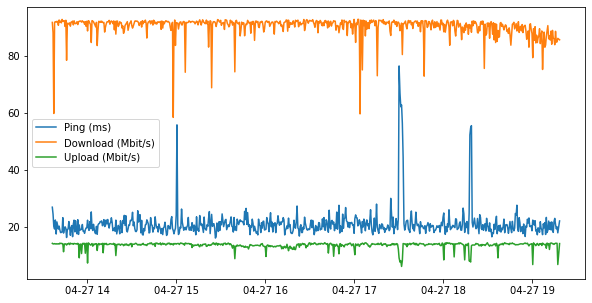

In [30]:
# Code Cell 32
# Initialise figure
fig, ax = plt.subplots(figsize=(10, 5))

# Create x-axis
t = pd.to_datetime(df_clean['Time'])


# Plot three curves of different colors
ax.plot(t, df_clean['Ping (ms)'], label='Ping (ms)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')

# Insert legend
ax.legend()
plt.show()

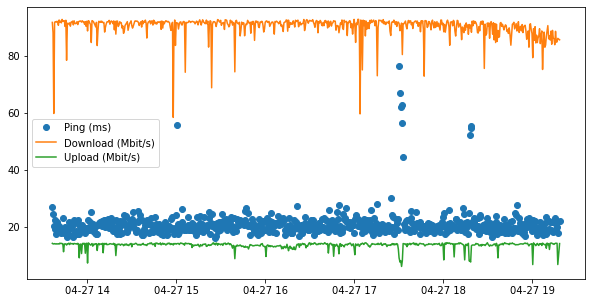

In [31]:
# Code Cell 33
# Initialise figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot three curves. Ping data 
# is visualized using dots
t = pd.to_datetime(df_clean['Time'])

# Plot three curves of different colors
ax.plot(t, df_clean['Ping (ms)'], 'o', label='Ping (ms)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')

# Insert legend
ax.legend()
plt.show()

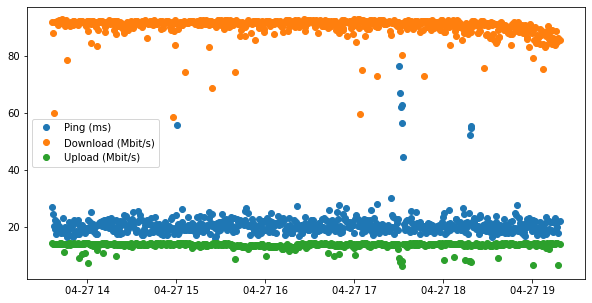

In [32]:
# Code Cell 33
# Initialise figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot three curves. Ping data 
# is visualized using dots
t = pd.to_datetime(df_clean['Time'])

# Plot three curves of different colors
ax.plot(t, df_clean['Ping (ms)'], 'o', label='Ping (ms)')
ax.plot(t, df_clean['Download (Mbit/s)'], 'o', label='Download (Mbit/s)')
ax.plot(t, df_clean['Upload (Mbit/s)'], 'o', label='Upload (Mbit/s)')

# Insert legend
ax.legend()
plt.show()

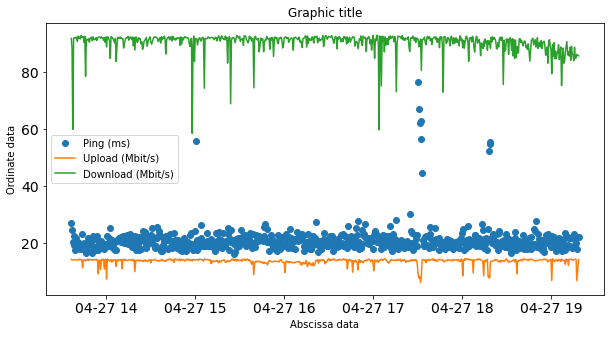

In [33]:
# Code Cell 35
# Initialise figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot three curves
t = pd.to_datetime(df_clean['Time'])
ax.plot(t, df_clean['Ping (ms)'], 'o', label='Ping (ms)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')

# Insert legend
ax.legend()

# Add axis labels and title
ax.set_xlabel('Abscissa data')
ax.set_ylabel('Ordinate data')
ax.set_title('Graphic title')

# Change tick size
ax.tick_params(labelsize=14)

In [34]:
# Code Cell 36
# Use a style context
#with ...
# with plt.style.context('fivethirtyeight'):

    # Initialise figure
    #fig, ax = 
    # fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    
    # Plot ping as a function of time
 
    # Add axis labels and title
    # ax.set_xlabel('Abscissa data')
    # ax.set_ylabel('Ordinate data')
    # ax.set_title('Graphic title')
    
    # Change tick size

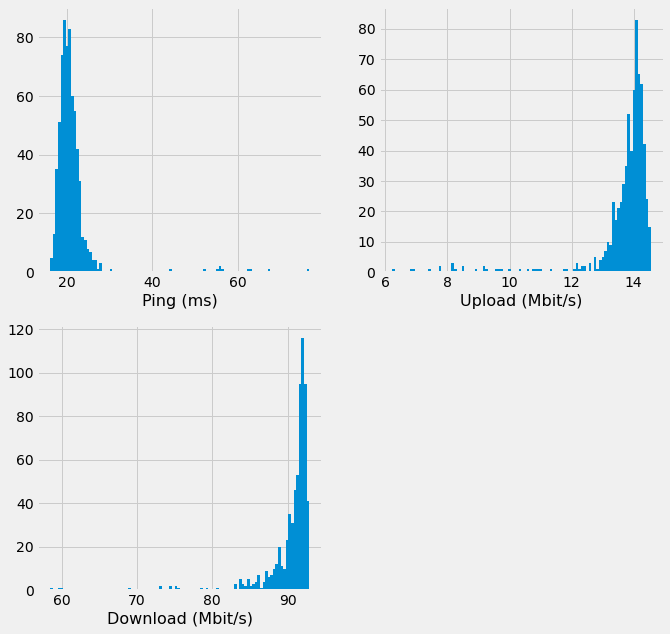

In [35]:
# Code Cell 37
with plt.style.context('fivethirtyeight'):
    
    nbins = 100
    # Initialize figure
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0][0].hist(df_clean['Ping (ms)'], nbins)
    ax[0][0].set_xlabel('Ping (ms)', fontsize=16)
    ax[0][0].tick_params(labelsize=14)
    ax[0][1].hist(df_clean['Upload (Mbit/s)'], nbins)
    ax[0][1].set_xlabel('Upload (Mbit/s)', fontsize=16)
    ax[0][1].tick_params(labelsize=14)
    ax[1][0].hist(df_clean['Download (Mbit/s)'], nbins)
    ax[1][0].set_xlabel('Download (Mbit/s)', fontsize=16)
    ax[1][0].tick_params(labelsize=14)
    ax[1][1].set_visible(False)